In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import csv

from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.neighbors import NearestNeighbors
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_fscore_support
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

print("Modules imported")

Modules imported


In [2]:
data=pd.read_csv('titanic.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
data.shape #Get the dimensions 

(891, 12)

In [4]:
data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [5]:
# Drop the columns which wont affect the survival
to_drop=['Ticket','Fare','Cabin','Name']
data.drop(to_drop,axis=1,)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,1,0,3,male,22.0,1,0,S
1,2,1,1,female,38.0,1,0,C
2,3,1,3,female,26.0,0,0,S
3,4,1,1,female,35.0,1,0,S
4,5,0,3,male,35.0,0,0,S
...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,0,0,S
887,888,1,1,female,19.0,0,0,S
888,889,0,3,female,NaN,1,2,S
889,890,1,1,male,26.0,0,0,C


In [6]:
data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [7]:
data['Family']=data['SibSp']+data['Parch']+1

In [8]:
data = data.drop('Name', axis=1,)
data = data.drop('Ticket', axis=1,)
data = data.drop('Fare', axis=1,)
data = data.drop('Cabin', axis=1,)
data = data.drop('SibSp', axis=1,)
data = data.drop('Parch', axis=1,)

In [9]:
data['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [10]:
# Fill the outliers i.e, Fill the NAN values
#Find out the no. of NAN values
column_list=list(data.columns.values)
for i in column_list:
    print(i ,':',sum(pd.isnull(data[i])))

PassengerId : 0
Survived : 0
Pclass : 0
Sex : 0
Age : 177
Embarked : 2
Family : 0


In [11]:
# Fill the Age with median ages #not mean
data['Age']=data['Age'].fillna(data['Age'].median())

In [12]:
data['Embarked'].mode()

0    S
dtype: object

In [13]:
# Fill Embarkment with highest frequency
data['Embarked']=data['Embarked'].fillna("S")

In [14]:
# Lets check again
column_list=list(data.columns.values)
for i in column_list:
    print(i ,':',sum(pd.isnull(data[i])))

PassengerId : 0
Survived : 0
Pclass : 0
Sex : 0
Age : 0
Embarked : 0
Family : 0


In [15]:
data['Age'].describe()

count    891.000000
mean      29.361582
std       13.019697
min        0.420000
25%       22.000000
50%       28.000000
75%       35.000000
max       80.000000
Name: Age, dtype: float64

In [16]:
# The minors were given priority as compared to major aged people
#Lets create column 'Adult'.if ages> 18 Adult=1 or 0
data['Adult']=0
data['Adult'][data['Age']>=18]=1

<ipython-input-16-4a2f1328bf1d>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Adult'][data['Age']>=18]=1


In [17]:
print ("Passengers more than 18 yrs old: ",str(len(data[data["Age"] >= 18])))

### Number of adult passengers  - Adult column

print ("Number of Adults: ",str(len(data[data["Adult"] >= 1])))

Passengers more than 18 yrs old:  778
Number of Adults:  778


In [18]:
data=data.drop('Age',axis=1,)

In [19]:
data.head()

,PassengerId,Survived,Pclass,Sex,Embarked,Family,Adult
0,1,0,3,male,S,2,1
1,2,1,1,female,C,2,1
2,3,1,3,female,S,1,1
3,4,1,1,female,S,2,1
4,5,0,3,male,S,1,1


In [20]:
# Lets define relation between features with survival
# Create a pivot table and bar chart to show relation in them
def pivot_class(param1,param2):
    df_slice=data[[param1,param2,'PassengerId']]
    slice_pivot=df_slice.pivot_table(index=[param1],columns=[param2],aggfunc=np.size, fill_value=0)
    p_chart=slice_pivot.plot.bar()
    for i in p_chart.patches:
        p_chart.annotate(str(i.get_height()), (i.get_x() * 1.05, i.get_height() * 1.01))  
    return slice_pivot
    return p_chart

    
    

PassengerId         
Pclass             1   2    3
Survived                     
0                 80  97  372
1                136  87  119

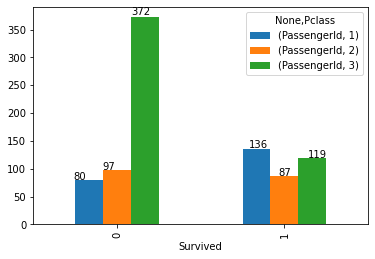

In [21]:
pivot_class("Survived","Pclass")

PassengerId     
Sex           female male
Survived                 
0                 81  468
1                233  109

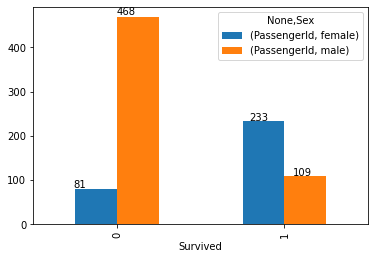

In [22]:
pivot_class("Survived","Sex")

PassengerId         
Embarked           C   Q    S
Survived                     
0                 75  47  427
1                 93  30  219

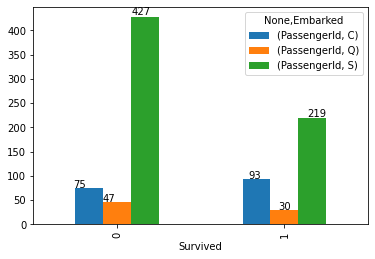

In [23]:
pivot_class("Survived","Embarked")

PassengerId                             
Family            1   2   3   4   5   6  7  8  11
Survived                                         
0                374  72  43   8  12  19  8  6  7
1                163  89  59  21   3   3  4  0  0

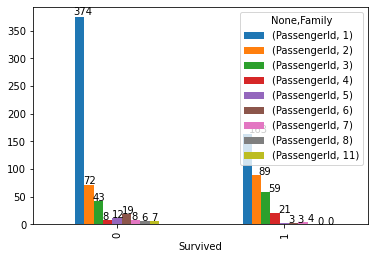

In [24]:
pivot_class("Survived","Family")

PassengerId     
Adult              0    1
Survived                 
0                 52  497
1                 61  281

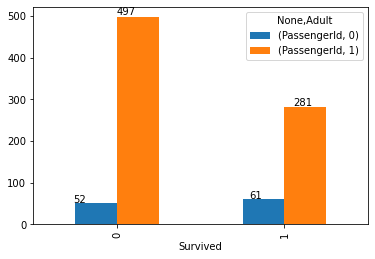

In [25]:
# Relation between passenger age and age
pivot_class("Survived","Adult")

In [26]:
# While after seeing the bar graphs ,adults were given priority than minors

#Select the best feature using SelectKBest
df1= data.filter(['Pclass','Sex','Embarked','Family','Adult'],axis=1)
X=df1
y=data['Survived']# We wnt the survival prediction


In [27]:
# For SelectKBest convert to same dtype
X["Embarked"].unique()

array(['S', 'C', 'Q'], dtype=object)

In [28]:
X["Embarked"][data["Embarked"]=='S']=1
X["Embarked"][data["Embarked"]=='C']=2
X["Embarked"][data["Embarked"]=='Q']=3

<ipython-input-28-237417bd32ed>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Embarked"][data["Embarked"]=='S']=1
<ipython-input-28-237417bd32ed>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Embarked"][data["Embarked"]=='C']=2
<ipython-input-28-237417bd32ed>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Embarked"][data["Embarked"]=='Q']=3


In [29]:
X["Sex"][data["Sex"]=="male"]=1
X["Sex"][data["Sex"]=="female"]=2

<ipython-input-29-40661eafcab8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Sex"][data["Sex"]=="male"]=1
<ipython-input-29-40661eafcab8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Sex"][data["Sex"]=="female"]=2


In [30]:
# Use SelectKBest to get the score of all features
test=SelectKBest(f_classif,k="all")
test_fit=test.fit(X,y)
score_feature=test_fit.scores_.round(3)# Get the score upto 3 decimals
p_values = -np.log10(test_fit.pvalues_).round(3)


In [31]:
feature_list=list(X.columns.values)
feature_list

['Pclass', 'Sex', 'Embarked', 'Family', 'Adult']

In [32]:
selected_features = test.get_support([test_fit])
selected_features

array([0, 1, 2, 3, 4], dtype=int32)

In [33]:
p_values

array([24.596, 68.852,  2.851,  0.208,  3.594])

In [34]:
score_feature

array([1.15031e+02, 3.72406e+02, 1.02590e+01, 2.46000e-01, 1.34850e+01])

In [35]:
#Lets save all this data in a dict
temporary_list=[]
for i in selected_features:
    temporary_list.append({'Feature':feature_list[i],'P_Value':p_values[i],'Score':score_feature[i]})
feat_select=pd.DataFrame(temporary_list)

In [36]:
feat_select=feat_select.sort_values(by="Score",axis=0,inplace=False,ascending=False,kind="quicksort",na_position='last')

In [37]:
feat_select

,Feature,P_Value,Score
1,Sex,68.852,372.406
0,Pclass,24.596,115.031
4,Adult,3.594,13.485
2,Embarked,2.851,10.259
3,Family,0.208,0.246


In [38]:
# Change the first column i.e ,Index
feat_select=feat_select.set_index("Feature")

In [39]:
feat_select

,P_Value,Score
Feature,,
Sex,68.852,372.406
Pclass,24.596,115.031
Adult,3.594,13.485
Embarked,2.851,10.259
Family,0.208,0.246


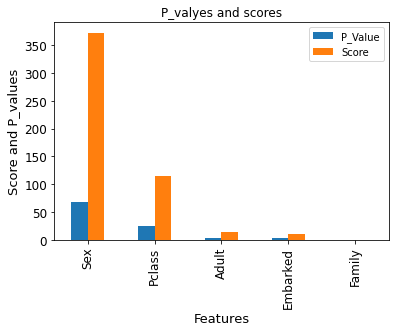

In [40]:
graph_score=feat_select[["P_Value","Score"]].plot(kind="bar",legend="True",fontsize=12,title="P_valyes and scores")
graph_score.set_xlabel("Features",fontsize=13)
graph_score.set_ylabel("Score and P_values",fontsize=13)
plt.show()

In [41]:
# From above graph select Sex,Pclass and Adult as main features 
X=X.drop("Embarked",axis=1,)
X=X.drop("Family",axis=1,)

In [42]:
X

,Pclass,Sex,Adult
0,3,1,1
1,1,2,1
2,3,2,1
3,1,2,1
4,3,1,1
...,...,...,...
886,2,1,1
887,1,2,1
888,3,2,1
889,1,1,1


In [43]:
# Train the model
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=1)

In [44]:
#Lets check the split
print("X_train :",X_train.shape)
print("X_test :",X_test.shape)
print("y_train :",y_train.shape)
print("y_test :",y_test.shape)

X_train : (623, 3)
X_test : (268, 3)
y_train : (623,)
y_test : (268,)


In [45]:
#Predict the scores using KNearestNeighbors and GridSearchCV
knn=KNeighborsClassifier()
k_range=list(range(1,10))
weight_option=['uniform','distance']
k_grid = dict(n_neighbors=k_range, weights = weight_option)
grid = GridSearchCV(knn, k_grid, cv=10, scoring = 'precision')
grid.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9],
                         'weights': ['uniform', 'distance']},
             scoring='precision')

In [46]:
print(str(grid.cv_results_)) # Ye samaj hi nahi aa raha he

{'mean_fit_time': array([0.00530689, 0.00624874, 0.00312591, 0.00468483, 0.00468838,
       0.00312448, 0.00468655, 0.00312448, 0.00312433, 0.00468659,
       0.00322313, 0.00468519, 0.00472326, 0.00156045, 0.00552275,
       0.00485067, 0.00481069, 0.00468655]), 'std_fit_time': array([0.00446237, 0.00765311, 0.00625181, 0.0071562 , 0.00716162,
       0.00624895, 0.00715882, 0.00624895, 0.00624866, 0.00715889,
       0.00645003, 0.00715674, 0.00626735, 0.00468135, 0.0061221 ,
       0.00706782, 0.00392805, 0.00715882]), 'mean_score_time': array([0.00986969, 0.00312414, 0.00624833, 0.00312452, 0.00468409,
       0.00624852, 0.00624824, 0.00468626, 0.00468628, 0.00312412,
       0.00734487, 0.00312548, 0.00670621, 0.00473223, 0.00774119,
       0.00548553, 0.00871849, 0.00312445]), 'std_score_time': array([0.00761733, 0.00624828, 0.00765261, 0.00624905, 0.00715507,
       0.00765285, 0.00765249, 0.00715838, 0.00715842, 0.00624824,
       0.00657794, 0.00625095, 0.00703692, 0.00627365, 0.

In [47]:
# Grid is better way to get n_neighbors
print("Best Scores :",str(grid.best_score_))
print("Best Param :",str(grid.best_params_))
print("Best Estimators :",str(grid.best_estimator_))

Best Scores : 0.8646616541353384
Best Param : {'n_neighbors': 8, 'weights': 'distance'}
Best Estimators : KNeighborsClassifier(n_neighbors=8, weights='distance')


In [48]:
# Lets check the accuracy
predict_=grid.predict(X_test)

In [50]:
accuracy=metrics.accuracy_score(y_test,predict_)
print("Accuracy score :",accuracy)

Accuracy score : 0.7574626865671642


In [53]:
# Its a good acuracy 
# Calculating precision, recall, and fbeta_score
get_stuff=precision_recall_fscore_support(y_test,predict_,average='weighted')
print("Precision :",str(get_stuff[0]))
print("Recall :",str(get_stuff[1]))
print("fbeta_score :",str(get_stuff[2]))

Precision : 0.7801172707889125
Recall : 0.7574626865671642
fbeta_score : 0.7435121688853032


In [54]:
test_data=pd.read_csv('titanic_test.csv')
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [55]:
test_data.dtypes

PassengerId      int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [56]:
# As for exsisting data, we need Sex,Pclass,Adult/Age
test_set=test_data[['Pclass','Sex','Age']].copy()

In [57]:
test_set.columns.values

array(['Pclass', 'Sex', 'Age'], dtype=object)

In [58]:
# Lets check for outliners
feat_list=list(test_set.columns.values)
for i in feat_list:
    print(i ,':',sum(pd.isnull(test_set[i])))

Pclass : 0
Sex : 0
Age : 86


In [59]:
# Lets fill the Age with median data
test_set['Age']=test_set['Age'].fillna(test_set['Age'].median())


In [60]:
# Create Adult wala column
test_set['Adult']=0
test_set['Adult'][test_set['Age']>=18]=1
test_set['Adult'][test_set['Age']<18]=0

<ipython-input-60-fa18dfcafac7>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_set['Adult'][test_set['Age']>=18]=1
<ipython-input-60-fa18dfcafac7>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_set['Adult'][test_set['Age']<18]=0


In [61]:
test_set=test_set.drop('Age',axis=1,)


In [62]:
# Lets convert the gender column also
test_set['Sex'][test_set['Sex']=='male']=1
test_set['Sex'][test_set['Sex']=='female']=2

<ipython-input-62-3ecb466d0af6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_set['Sex'][test_set['Sex']=='male']=1
<ipython-input-62-3ecb466d0af6>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_set['Sex'][test_set['Sex']=='female']=2


In [63]:
test_set

,Pclass,Sex,Adult
0,3,1,1
1,3,2,1
2,2,1,1
3,3,1,1
4,3,2,1
...,...,...,...
413,3,1,1
414,1,2,1
415,3,1,1
416,3,1,1


In [64]:
test_set.head(30)

,Pclass,Sex,Adult
0,3,1,1
1,3,2,1
2,2,1,1
3,3,1,1
4,3,2,1
5,3,1,0
6,3,2,1
7,2,1,1
8,3,2,1
9,3,1,1


In [65]:
final_prediction=grid.predict(test_set)
final_prediction

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [66]:
print(len(final_prediction))

418


In [67]:
# The prediction == rows
Survived=0
dead=0
#Lets check kitne log bach gaye aur kitne mar gaye
for i in range(0,len(final_prediction)):
    if final_prediction[i]==0:
        dead+=1
    else:
        Survived+=1
        
print("Survival prediction :",Survived)
print("Dead :",dead)
print(" Total :",Survived+dead)

Survival prediction : 98
Dead : 320
 Total : 418


In [68]:
# Lets create a final file with predictions
# Creating new column for survived
test_data['Survived']=pd.Series(final_prediction,index=test_data.index)

In [69]:
test_data.head(20)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,0
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S,0
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q,0
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S,0
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C,0
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S,0


In [70]:
final_df = test_data.filter(['PassengerId','Name','Survived'], axis=1)

In [71]:
final_df

,PassengerId,Name,Survived
0,892,"Kelly, Mr. James",0
1,893,"Wilkes, Mrs. James (Ellen Needs)",0
2,894,"Myles, Mr. Thomas Francis",0
3,895,"Wirz, Mr. Albert",0
4,896,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0
...,...,...,...
413,1305,"Spector, Mr. Woolf",0
414,1306,"Oliva y Ocana, Dona. Fermina",1
415,1307,"Saether, Mr. Simon Sivertsen",0
416,1308,"Ware, Mr. Frederick",0


In [72]:
# Exporting predictions as csv
final_df.to_csv("titanic_predictions.csv", encoding='utf-8')